Información sobre media

In [1]:
import pandas as pd
df_metadata = pd.read_csv(r'C:\Users\MegaTecnologia\Desktop\DesafioTelecom\Data\metadata.csv',
                      sep=";")

In [2]:
df_metadata.head(10)

,asset_id,content_id,title,reduced_title,episode_title,show_type,released_year,country_of_origin,category,keywords,...,language_rating,dialog_rating,fv_rating,pay_per_view,pack_premium_1,pack_premium_2,create_date,modify_date,start_vod_date,end_vod_date
0,15188,0.0,Ep:17 Tiempos Compulsivos,Tiempos_Compul_E17,Episodio 17,Serie,2012.0,AR,Drama,"Trastornos,Médicos,Tragicómica,Telenovela,Enfe...",...,N,N,N,N,N,N,2017-12-01T10:18:15.0Z,2019-01-26T06:37:18.0Z,2017-12-01T00:00:00.0Z,2020-12-01T23:59:59.0Z
1,24940,1.0,7 Cajas,7_Cajas,NaN,Película,2012.0,PY,Suspenso/Acción,"Latinoamérica,Pobreza,Crimen,Pandillas",...,N,N,N,Y,N,N,2017-12-19T20:58:15.0Z,2019-09-17T19:02:03.0Z,2017-12-15T00:00:00.0Z,2022-12-14T23:59:59.0Z
2,21939,2.0,La Maldición de las Hormigas Gigantes,La_Maldicion_de_las,NaN,Película,2016.0,FI,Terror/Comedia,"Criaturas,Plagas,Adolescentes,Fantasía,Video J...",...,N,N,N,N,N,N,2018-02-16T13:51:07.0Z,2020-04-28T14:16:38.0Z,2018-01-25T00:00:00.0Z,2020-12-01T23:59:59.0Z
3,9005,3.0,Una Mujer Fantástica,Una_Mujer_Fantastic,NaN,Película,2017.0,CL,Drama,"LGBT,Mujeres,Latinoamérica",...,N,N,N,N,Y,N,2018-05-26T11:58:44.0Z,2019-11-15T03:00:23.0Z,2018-05-27T00:00:00.0Z,2021-04-30T23:59:59.0Z
4,7391,4.0,Star Trek,Star_Trek,NaN,Película,2009.0,US,Ciencia Ficción/Aventura,"Fantasía,Galaxia,Futurismo,Aliens,Criaturas",...,N,N,N,Y,N,N,2019-05-03T20:07:24.0Z,2020-04-09T04:37:29.0Z,2019-05-02T00:00:00.0Z,2020-12-31T23:59:59.0Z
5,17760,5.0,T:2 Ep:06 Gaycation,Gaycation_T2_E06,United we stand,TV,2017.0,US,Documental/Cultura,"LGBT,Sociedad,Cultura,Feminismo",...,N,N,N,N,N,N,2019-06-27T14:20:42.0Z,2019-11-02T03:16:48.0Z,2019-06-27T00:00:00.0Z,2021-07-27T23:59:59.0Z
6,3619,6.0,T:1 Ep:04 His Dark Materials,His_Dark_Mat_T1_E04,Armour,Serie,2019.0,GB,Aventura/Fantasía,"Fantasía,De Libros,Criaturas",...,N,N,N,N,N,Y,2019-11-26T22:52:28.0Z,2019-11-26T23:06:01.0Z,2019-11-26T00:00:00.0Z,2020-12-01T23:59:00.0Z
7,2472,7.0,12/01 - Almorzando con Mirtha Legrand,Almorzando_ML_01-12,01 Diciembre 2019,TV,2019.0,AR,Interés General/Espectáculo,"Actualidad,Espectáculos",...,N,N,N,N,N,N,2019-12-04T05:20:43.0Z,2020-06-14T17:47:50.0Z,2019-12-02T00:00:00.0Z,2020-12-01T23:59:59.0Z
8,5066,6.0,T:1 Ep:05 His Dark Materials,His_Dark_Mat_T1_E05,The Lost Boy,Serie,2019.0,GB,Aventura/Fantasía,"Fantasía,De Libros,Criaturas",...,N,N,N,N,N,Y,2019-12-04T12:11:57.0Z,2019-12-04T13:06:01.0Z,2019-12-03T00:00:00.0Z,2020-12-01T23:59:00.0Z
9,32482,8.0,T:1 Ep:05 Mickey: Aventuras sobre ruedas,Mickey_Avent_T1_E05,"Agente cero, cero Goofy / El huevo exasperante",TV,2017.0,US,Infantil/Dibujos Animados,"Amigos,Aventuras,Autos",...,N,N,N,N,N,N,2020-01-08T00:59:01.0Z,2020-10-09T02:13:54.0Z,2019-10-09T00:00:00.0Z,2020-12-01T23:59:59.0Z


In [3]:
df_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33144 entries, 0 to 33143
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   asset_id            33144 non-null  int64  
 1   content_id          33123 non-null  float64
 2   title               33144 non-null  object 
 3   reduced_title       33144 non-null  object 
 4   episode_title       28997 non-null  object 
 5   show_type           33140 non-null  object 
 6   released_year       33144 non-null  float64
 7   country_of_origin   33140 non-null  object 
 8   category            33144 non-null  object 
 9   keywords            33142 non-null  object 
 10  description         33142 non-null  object 
 11  reduced_desc        33144 non-null  object 
 12  cast_first_name     24412 non-null  object 
 13  credits_first_name  20590 non-null  object 
 14  run_time_min        33144 non-null  float64
 15  audience            33143 non-null  object 
 16  made

In [4]:
#Vemos si hay nulls que nos vayan a romper alguna predicción
df_metadata.isnull().values.any()

True

In [5]:
#El problema de los nulls está muy marcado por columnas
df_metadata["episode_title"].fillna(-1, inplace = True)
df_metadata["content_id"].fillna(-1, inplace = True)
df_metadata["show_type"].fillna(-1, inplace = True)
df_metadata["country_of_origin"].fillna(-1, inplace = True)
df_metadata["keywords"].fillna(df_metadata['category'], inplace = True)
df_metadata["keywords"].replace(to_replace="/", value = ",", inplace = True)
#Como no existen descripciones reducidas nulas, la idea sería tmb autocompletar ese campo
df_metadata["description"].fillna(-1, inplace = True)
#Este se podría por media con igual asset
df_metadata["cast_first_name"].fillna("No disponible", inplace = True)
df_metadata["credits_first_name"].fillna("No disponible", inplace = True)
#Ver de llenarlo con General o el más común
df_metadata["audience"].fillna("General", inplace = True)

In [6]:
#Corroboramos
df_metadata.isnull().values.any()

False

Vamos a empezar por gestionar los nulls

In [7]:
#Se va el campo título que no necesitamos
df_metadata = df_metadata.drop('title', axis=1)
df_metadata = df_metadata.drop('reduced_title', axis=1)
df_metadata = df_metadata.drop('episode_title', axis=1)

<AxesSubplot:xlabel='count', ylabel='audience'>

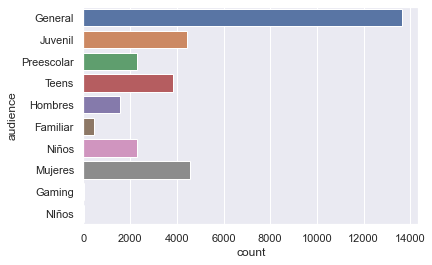

In [8]:
#Vemos los dispositivos más usados
import seaborn as sns

sns.set_theme(style="darkgrid")
sns.countplot(y='audience', data=df_metadata)

In [9]:
#Vamos a hacer un agrupamiento de la audiencia solo por edad
df_metadata['audience'] = df_metadata['audience'].replace(to_replace="Preescolar", value="Juvenil")
df_metadata['audience'] = df_metadata['audience'].replace(to_replace="Teens", value="Juvenil")
df_metadata['audience'] = df_metadata['audience'].replace(to_replace="Hombres", value="General")
df_metadata['audience'] = df_metadata['audience'].replace(to_replace="Familiar", value="General")
df_metadata['audience'] = df_metadata['audience'].replace(to_replace="Mujeres", value="General")
df_metadata['audience'] = df_metadata['audience'].replace(to_replace="Gaming", value="Juvenil")
df_metadata['audience'] = df_metadata['audience'].replace(to_replace="NIños", value="Niños")

<AxesSubplot:xlabel='count', ylabel='audience'>

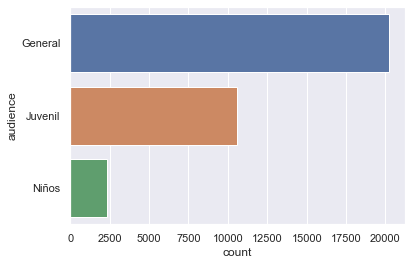

In [10]:
sns.set_theme(style="darkgrid")
sns.countplot(y='audience', data=df_metadata)

Como casi no hay -1, vamos a pasarlo a general

In [11]:
#Como content es un id, voy a llevarlo a tipo entero
df_metadata['content_id'] = df_metadata['content_id'].astype('int32')
df_metadata['released_year'] = df_metadata['released_year'].astype('int32')
df_metadata['run_time_min'] = df_metadata['run_time_min'].astype('int32')

In [12]:
#Voy a sacar por ahora los datos de fecha porque no les veo utilidad
df_metadata = df_metadata.drop('create_date', axis=1)
df_metadata = df_metadata.drop('modify_date', axis=1)
df_metadata = df_metadata.drop('start_vod_date', axis=1)
df_metadata = df_metadata.drop('end_vod_date', axis=1)

In [13]:
#También las descripciones por ahora
df_metadata = df_metadata.drop('description', axis=1)
df_metadata = df_metadata.drop('reduced_desc', axis=1)

<AxesSubplot:xlabel='credits_first_name', ylabel='count'>

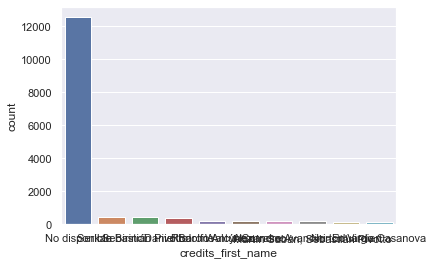

In [14]:
#Directores con más contenido
sns.countplot(x='credits_first_name', data=df_metadata,
             order=df_metadata.credits_first_name.value_counts().iloc[:10].index)

<AxesSubplot:xlabel='count', ylabel='credits_first_name'>

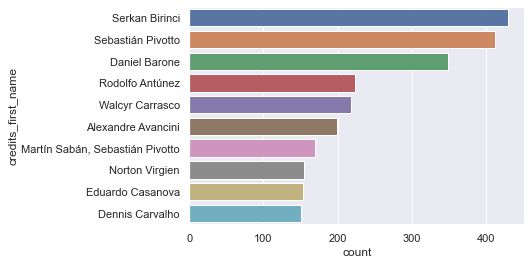

In [15]:
#Como no disponible, vemos la incidencia de los otros
sns.countplot(y='credits_first_name', data=df_metadata,
              orient = "h",
             order=df_metadata.credits_first_name.value_counts().iloc[1:11].index)

In [16]:
#Por el momento, decidimos que no tiene incidencia relevante y lo volamos
df_metadata = df_metadata.drop('credits_first_name', axis=1)

In [17]:
df_metadata.head()

,asset_id,content_id,show_type,released_year,country_of_origin,category,keywords,cast_first_name,run_time_min,audience,made_for_tv,close_caption,sex_rating,violence_rating,language_rating,dialog_rating,fv_rating,pay_per_view,pack_premium_1,pack_premium_2
0,15188,0,Serie,2012,AR,Drama,"Trastornos,Médicos,Tragicómica,Telenovela,Enfe...","Rodrigo De la Serna, Paola Krum, Fernán Mirás,...",48,General,N,N,N,N,N,N,N,N,N,N
1,24940,1,Película,2012,PY,Suspenso/Acción,"Latinoamérica,Pobreza,Crimen,Pandillas","Celso Franco, Víctor Sosa, Lali Gonzalez",105,General,N,N,N,N,N,N,N,Y,N,N
2,21939,2,Película,2016,FI,Terror/Comedia,"Criaturas,Plagas,Adolescentes,Fantasía,Video J...","Mark Arnold, Harry Lister Smith, Vanessa Grass...",82,Juvenil,Y,N,N,N,N,N,N,N,N,N
3,9005,3,Película,2017,CL,Drama,"LGBT,Mujeres,Latinoamérica","Daniela Vega, Francisco Reyes, Luis Gnecco, Am...",99,General,N,N,N,N,N,N,N,N,Y,N
4,7391,4,Película,2009,US,Ciencia Ficción/Aventura,"Fantasía,Galaxia,Futurismo,Aliens,Criaturas","Chris Pine, Zachary Quinto, Leonard Nimoy, Eri...",126,General,N,N,N,N,N,N,N,Y,N,N


In [18]:
#Creo un sub_df
#sub_df = df_metadata[['category','keywords','cast_first_name', 'audience']]
#Voy a sacar también el cast porque se pone muy pesado
sub_df = df_metadata[['category','keywords','cast_first_name', 'audience']]
sub_df

,category,keywords,cast_first_name,audience
0,Drama,"Trastornos,Médicos,Tragicómica,Telenovela,Enfe...","Rodrigo De la Serna, Paola Krum, Fernán Mirás,...",General
1,Suspenso/Acción,"Latinoamérica,Pobreza,Crimen,Pandillas","Celso Franco, Víctor Sosa, Lali Gonzalez",General
2,Terror/Comedia,"Criaturas,Plagas,Adolescentes,Fantasía,Video J...","Mark Arnold, Harry Lister Smith, Vanessa Grass...",Juvenil
3,Drama,"LGBT,Mujeres,Latinoamérica","Daniela Vega, Francisco Reyes, Luis Gnecco, Am...",General
4,Ciencia Ficción/Aventura,"Fantasía,Galaxia,Futurismo,Aliens,Criaturas","Chris Pine, Zachary Quinto, Leonard Nimoy, Eri...",General
...,...,...,...,...
33139,Drama/Documental,"Abusos,Familia,Juicio,Hechos Reales,Miniserie","Mia Farrow, Woody Allen, Dylan Farrow, Ronan F...",General
33140,Drama/Documental,"Abusos,Familia,Juicio,Hechos Reales,Miniserie","Mia Farrow, Woody Allen, Dylan Farrow, Ronan F...",General
33141,Infantil/Comedia,"Instituto,Amigos,Música",Gülru arruinó el nuevo diseño de Gulfem.,Juvenil
33142,Acción/Aventura,"DC Comics,Superhéroes,Mujeres,Comics","Javicia Leslie, Rachel Skarsten, Meagan Tandy,...",General


In [19]:
def to_dummies(variable, df, separator):
    split_data = df[variable].str.split(separator, expand=True)
    df_dummies = pd.get_dummies(split_data, prefix= str(variable))
    return df_dummies

In [20]:
categ_dummy = to_dummies("category",sub_df,"/")
keyword_dummy = to_dummies("keywords",sub_df,",")
#cast_dummy = to_dummies("cast_first_name",sub_df,",")
audience_dummy = to_dummies("audience",sub_df,",")

In [21]:
#sub_df = pd.concat([categ_dummy, keyword_dummy, cast_dummy, audience_dummy], axis=1)
sub_df = pd.concat([categ_dummy, keyword_dummy, audience_dummy], axis=1)
sub_df

,category_Accion,category_Acción,category_Animación,category_Aventura,category_Biografía,category_Ciencia Ficción,category_Ciencia ficción,category_Comedia,category_Competencia,category_Crimen,...,keywords_Taquilleras,keywords_90s,keywords_De Libros,keywords_Pobreza,keywords_Sociedad,keywords_De Libros,keywords_Sociedad,audience_General,audience_Juvenil,audience_Niños
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
33140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
33141,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33142,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
extend_df = pd.concat([df_metadata, sub_df], axis=1)
extend_df = extend_df.drop('category', axis=1)
extend_df = extend_df.drop('keywords', axis=1)
extend_df = extend_df.drop('cast_first_name', axis=1)
extend_df = extend_df.drop('audience', axis=1)
extend_df

,asset_id,content_id,show_type,released_year,country_of_origin,run_time_min,made_for_tv,close_caption,sex_rating,violence_rating,...,keywords_Taquilleras,keywords_90s,keywords_De Libros,keywords_Pobreza,keywords_Sociedad,keywords_De Libros,keywords_Sociedad,audience_General,audience_Juvenil,audience_Niños
0,15188,0,Serie,2012,AR,48,N,N,N,N,...,0,0,0,0,0,0,0,1,0,0
1,24940,1,Película,2012,PY,105,N,N,N,N,...,0,0,0,0,0,0,0,1,0,0
2,21939,2,Película,2016,FI,82,Y,N,N,N,...,0,0,0,0,0,0,0,0,1,0
3,9005,3,Película,2017,CL,99,N,N,N,N,...,0,0,0,0,0,0,0,1,0,0
4,7391,4,Película,2009,US,126,N,N,N,N,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33139,3683,1979,Serie,2021,US,64,N,N,N,N,...,0,0,0,0,0,0,0,1,0,0
33140,16810,1979,Serie,2021,US,56,N,N,N,N,...,0,0,0,0,0,0,0,1,0,0
33141,20468,943,TV,2011,US,24,N,N,N,N,...,0,0,0,0,0,0,0,0,1,0
33142,3779,1957,Serie,2021,US,42,N,N,N,N,...,0,0,0,0,0,0,0,1,0,0


<AxesSubplot:xlabel='count', ylabel='show_type'>

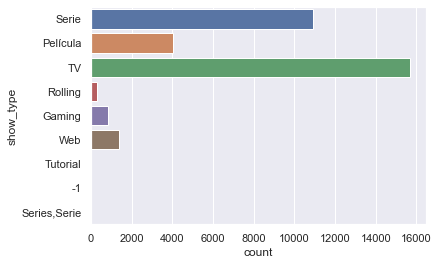

In [23]:
sns.countplot(y='show_type', data=extend_df)

<AxesSubplot:xlabel='count', ylabel='show_type'>

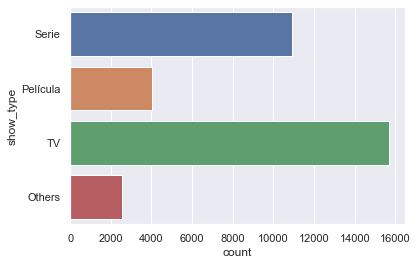

In [24]:
otros = ['Rolling', 'Gaming', 'Web', 'Tutorial', -1]
extend_df['show_type'] = extend_df['show_type'].replace(to_replace=otros, value="Others")
extend_df['show_type'] = extend_df['show_type'].replace(to_replace="Series,Serie", value="Serie")
sns.countplot(y='show_type', data=extend_df)

<AxesSubplot:xlabel='country_of_origin', ylabel='count'>

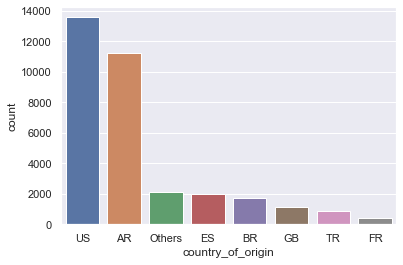

In [27]:
sns.countplot(x='country_of_origin', data=extend_df,
             order=extend_df.country_of_origin.value_counts().iloc[:10].index)

In [26]:
top = ['US', 'AR', 'ES', 'BR', 'GB', 'TR', 'FR']
mask = ~extend_df['country_of_origin'].isin(top)
extend_df.loc[mask, 'country_of_origin'] = 'Others'

<AxesSubplot:xlabel='count', ylabel='show_type'>

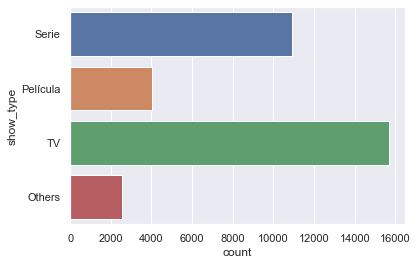

In [28]:
otros = ['Rolling', 'Gaming', 'Web', 'Tutorial', -1]
extend_df['show_type'] = extend_df['show_type'].replace(to_replace=otros, value="Others")
extend_df['show_type'] = extend_df['show_type'].replace(to_replace="Series,Serie", value="Serie")
sns.countplot(y='show_type', data=extend_df)

In [29]:
#Voy a dejar como bool flags las otras
extend_df.replace(to_replace="N",
                 value=0,
                 inplace=True)

extend_df.replace(to_replace="Y",
                 value=1,
                 inplace=True)

In [30]:
for i in extend_df.columns:
    try:
        suma = extend_df[i].sum()
        if suma < 500:
            extend_df.drop(i, axis=1, inplace=True)
    except:
        pass

In [31]:
extend_df

,asset_id,content_id,show_type,released_year,country_of_origin,run_time_min,pay_per_view,pack_premium_1,pack_premium_2,category_Acción,...,keywords_Taquilleras,keywords_90s,keywords_De Libros,keywords_Pobreza,keywords_Sociedad,keywords_De Libros,keywords_Sociedad,audience_General,audience_Juvenil,audience_Niños
0,15188,0,Serie,2012,AR,48,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,24940,1,Película,2012,Others,105,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,21939,2,Película,2016,Others,82,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,9005,3,Película,2017,Others,99,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,7391,4,Película,2009,US,126,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33139,3683,1979,Serie,2021,US,64,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
33140,16810,1979,Serie,2021,US,56,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
33141,20468,943,TV,2011,US,24,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33142,3779,1957,Serie,2021,US,42,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0


In [32]:
extend_df.to_csv('Dummie_Metadata.csv')